## Importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("F:/Programming/Project/aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Basic EDA

In [3]:
df.shape

(180, 9)


- Data Shape Analysis:
  - The dataset consists of 180 records and 9 columns.
  - Categorical variables include Product, Gender, and Marital status.
  - Continuous attributes within the dataset include Miles and Income.
  - The remaining columns contain discrete data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Above are the stats of all the numeric data types:
In the dataset:
- The average age is approximately 28.79 years, with the youngest being 18 and the oldest 50.
- Individuals have received an average of 15.57 years of education, with the range spanning from 12 to 21 years.
- Product usage occurs, on average, 3.46 times per week, with frequencies ranging from 2 to 7 times.
- Reported fitness levels average at 3.31, with ratings varying between 1 and 5.
- Mean income stands at 53,719.58 dollar, with incomes ranging from 29,562 dollar to 104,581 dollar.
- On average, individuals cover approximately 103.19 miles, with distances ranging from 21 to 360 miles.

In [6]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Upon checking for the null values, data doesn't have any missing values

In [7]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are three different products:
1. KP281
2. KP481
3. KP781


## Graphical Analysis

### Outlier Detection

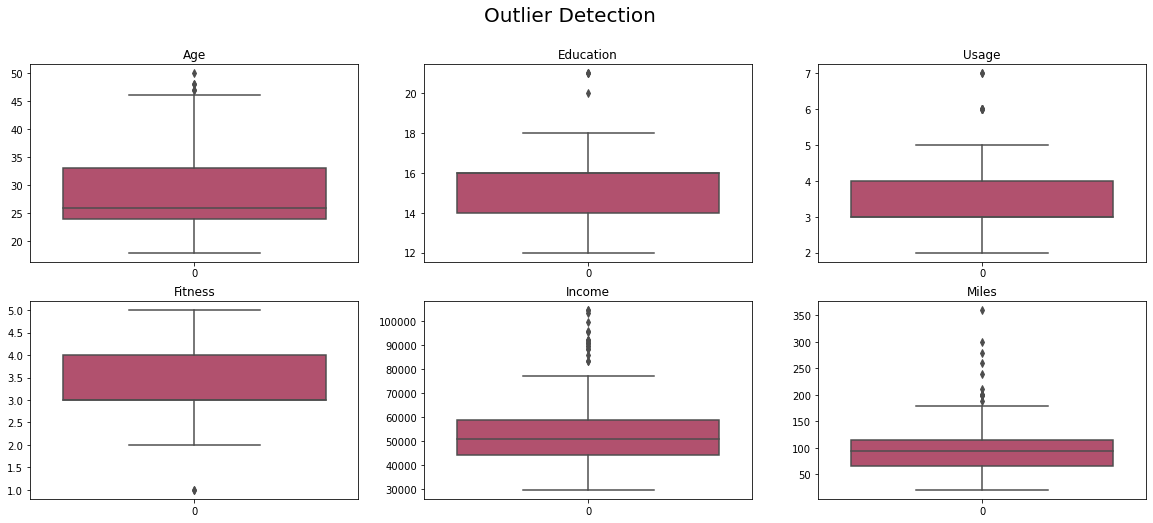

In [8]:
plt.figure(figsize=(20,8)).suptitle('Outlier Detection', fontsize=20)

plt.subplot(2,3,1)
sns.boxplot(data=df['Age'],palette=("flare"))
plt.title('Age')

plt.subplot(2,3,2)
sns.boxplot(data=df['Education'], palette=("flare"))
plt.title('Education')


plt.subplot(2,3,3)
sns.boxplot(data=df['Usage'], palette=("flare"))
plt.title('Usage')


plt.subplot(2,3,4)
sns.boxplot(data=df['Fitness'], palette=("flare"))
plt.title('Fitness')


plt.subplot(2,3,5)
sns.boxplot(data=df['Income'], palette=("flare"))
plt.title('Income')


plt.subplot(2,3,6)
sns.boxplot(data=df['Miles'], palette=("flare"))
plt.title('Miles')


plt.show()

In [9]:
F_5=df['Fitness'].quantile(0.5)
F_95=df['Fitness'].quantile(0.95)
df['Fitness']=df['Fitness'].clip(F_5, F_95)

In [10]:
I_5=df['Income'].quantile(0.5)
I_95=df['Income'].quantile(0.95)
df['Income']=df['Income'].clip(I_5, I_95)

In [11]:
A_5=df['Age'].quantile(0.5)
A_95=df['Age'].quantile(0.95)
df['Age']=df['Age'].clip(A_5, A_95)

In [12]:
U_5=df['Usage'].quantile(0.5)
U_95=df['Usage'].quantile(0.95)
df['Usage']=df['Usage'].clip(U_5, U_95)

In [13]:
M_5=df['Miles'].quantile(0.5)
M_95=df['Miles'].quantile(0.95)
df['Miles']=df['Miles'].clip(M_5, M_95)

In [14]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,29.896944,15.572222,3.580278,3.477778,57580.651389,113.761111
std,5.326654,1.617055,0.736944,0.772832,12223.669957,33.169678
min,26.000000,12.000000,3.000000,3.000000,50596.500000,94.000000
25%,26.000000,14.000000,3.000000,3.000000,50596.500000,94.000000
50%,26.000000,16.000000,3.000000,3.000000,50880.750000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,43.050000,21.000000,5.050000,5.000000,90948.250000,200.000000


### Stats after Handling Outliers:
- **Age**: Average age is around **29.9 years** (ranging from 26 to 43.1 years).
- **Education**: Average education level is **15.6 years** (12 to 21 years).
- **Usage**: Average usage score is **3.58** (ranging from 3.0 to 5.05).
- **Fitness**: Average fitness score is **3.48** (ranging from 3.0 to 5.0).
- **Income**: Average income is approximately **$57,580.65** (ranging from 50,596.50 dollar to 90,948.25 dollar).
- **Miles**: Average distance traveled is **113.76 miles** (ranging from 94 to 200 miles).


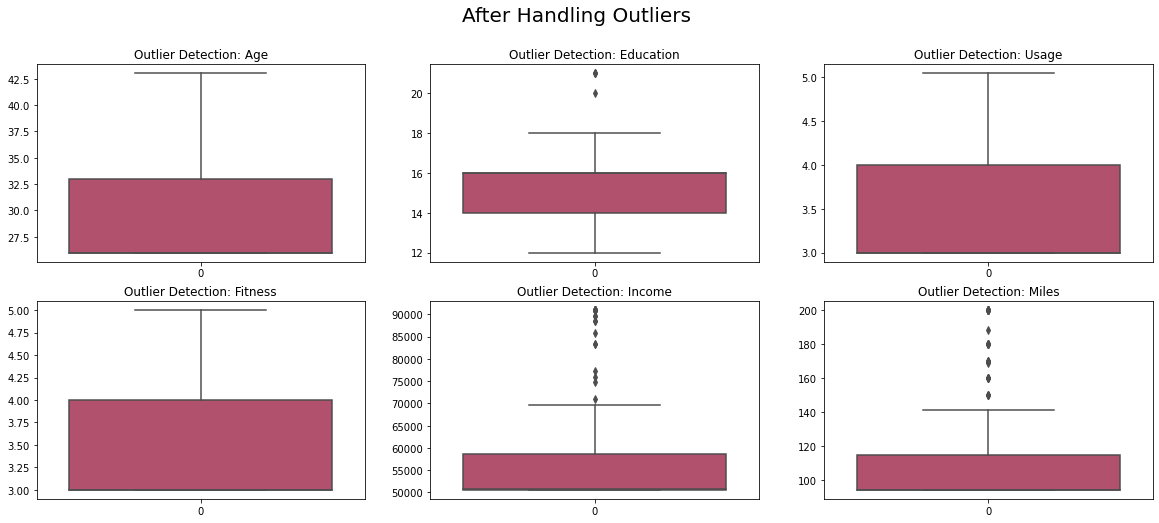

In [15]:
plt.figure(figsize=(20,8)).suptitle('After Handling Outliers', fontsize=20)

plt.subplot(2,3,1)
sns.boxplot(data=df['Age'], palette=("flare"))
plt.title('Outlier Detection: Age')

plt.subplot(2,3,2)
sns.boxplot(data=df['Education'], palette=("flare"))
plt.title('Outlier Detection: Education')


plt.subplot(2,3,3)
sns.boxplot(data=df['Usage'], palette=("flare"))
plt.title('Outlier Detection: Usage')


plt.subplot(2,3,4)
sns.boxplot(data=df['Fitness'], palette=("flare"))
plt.title('Outlier Detection: Fitness')


plt.subplot(2,3,5)
sns.boxplot(data=df['Income'], palette=("flare"))
plt.title('Outlier Detection: Income')


plt.subplot(2,3,6)
sns.boxplot(data=df['Miles'], palette=("flare"))
plt.title('Outlier Detection: Miles')


plt.show()

## Univarite Analysis

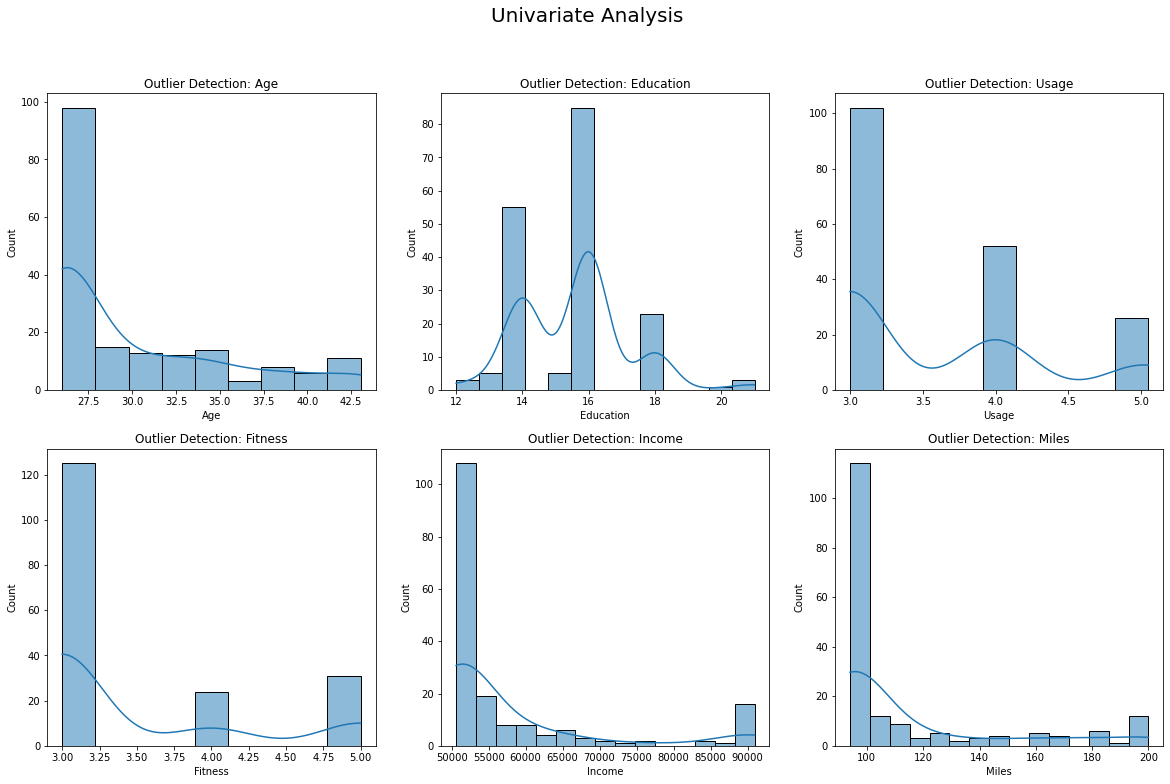

In [38]:
plt.figure(figsize=(20,12)).suptitle('Univariate Analysis', fontsize=20)

plt.subplot(2,3,1)
sns.histplot(data=df['Age'], kde= True)
plt.title('Outlier Detection: Age')

plt.subplot(2,3,2)
sns.histplot(data=df['Education'], kde= True)
plt.title('Outlier Detection: Education')


plt.subplot(2,3,3)
sns.histplot(data=df['Usage'], kde= True)
plt.title('Outlier Detection: Usage')


plt.subplot(2,3,4)
sns.histplot(data=df['Fitness'], kde= True)
plt.title('Outlier Detection: Fitness')


plt.subplot(2,3,5)
sns.histplot(data=df['Income'], kde= True)
plt.title('Outlier Detection: Income')


plt.subplot(2,3,6)
sns.histplot(data=df['Miles'], kde= True)
plt.title('Outlier Detection: Miles')


plt.show()

### Analysis of all the attributes with respect to the dataset

### Analysis with respect to gender and martial status with respect to different products

In [17]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

## Observations:
### Product
- **44.44%** of the customers have purchased **KP281** product.
- **33.33%** of the customers have purchased **KP481** product.
- **22.22%** of the customers have purchased **KP781** product.

### Gender
 **57.78%** of the customers are Male.
 
### MaritalStatus
 **59.44%** of the customers are Partnered.


## Bivarite Analysis

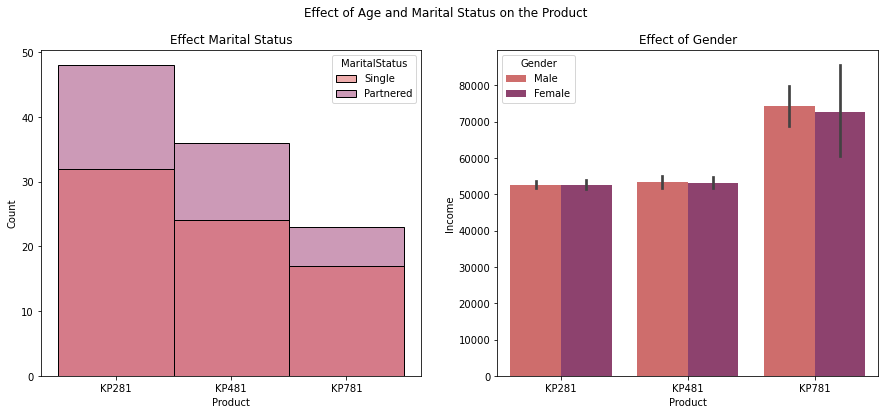

In [18]:
plt.figure(figsize=(15,6)).suptitle('Effect of Age and Marital Status on the Product')

plt.subplot(1,2,1)
sns.histplot(data=df, x='Product', hue='MaritalStatus', palette=("flare"))
plt.title('Effect Marital Status')

plt.subplot(1,2,2)
sns.barplot(data=df, x='Product', y='Income', hue='Gender', palette=("flare"))
plt.title('Effect of Gender')

plt.show()

### Inights:

1. **Effect of Marital Status**:
    - **Single Individuals**: Prefer **Product KP281**.
    - **Partnered Individuals**: Favor **Product KP481**.
    - **Married Individuals**: Show a strong preference for **Product KP781**.

2. **Effect of Gender**:
    - Both **Males and Females** exhibit similar income levels across all three products (KP281, KP481, KP781) with minor differences.


## Marginal Probability

In [19]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

### Marginal Probabilities:
- KP281  -  44.4%
- KP481  -  33.3%
- KP781  -  22.2%

## Condional Probabilities:

In [20]:
pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [21]:
print("KP281:")
KP281_S= 32/73
print("Probabilty of purchase by singles:",round(KP281_S*100,2),"%")

KP281_P= 48/107
print("Probabilty of purchase by Parterned:",round(KP281_P*100,2),"%")

print("\nKP481:")
KP481_S= 24/73
print("Probabilty of purchase by singles:",round(KP481_S*100,2),"%")

KP481_P= 36/107
print("Probabilty of purchase by Parterned:",round(KP481_P*100,2),"%")

print("\nKP781:")
KP781_S= 17/73
print("Probabilty of purchase by singles:",round(KP781_S*100,2),"%")

KP781_P= 23/107
print("Probabilty of purchase by Parterned:",round(KP781_P*100,2),"%")

KP281:
Probabilty of purchase by singles: 43.84 %
Probabilty of purchase by Parterned: 44.86 %

KP481:
Probabilty of purchase by singles: 32.88 %
Probabilty of purchase by Parterned: 33.64 %

KP781:
Probabilty of purchase by singles: 23.29 %
Probabilty of purchase by Parterned: 21.5 %


### Analysis of Purchase Probabilities by Gender for Different Products:

- **KP281**:
  - Singles: **43.84%** purchase probability
  - Partnered: **44.86%** purchase probability

- **KP481**:
  - Singles: **32.88%** purchase probability
  - Partnered: **33.64%** purchase probability

- **KP781**:
  - Singles: **23.29%** purchase probability
  - Partnered: **21.5%** purchase probability

In [22]:
pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [23]:
print("KP281:")
KP281_F= 40/76
print("Probabilty of purchase by Females:",round(KP281_S*100,2),"%")

KP281_M= 40/104
print("Probabilty of purchase by Males:",round(KP281_P*100,2),"%")

print("\nKP481:")
KP481_F= 29/76
print("Probabilty of purchase by Females",round(KP481_S*100,2),"%")

KP481_M= 33/104
print("Probabilty of purchase by Males:",round(KP481_P*100,2),"%")

print("\nKP781:")
KP781_F= 7/76
print("Probabilty of purchase by Females:",round(KP781_S*100,2),"%")

KP781_M= 33/104
print("Probabilty of purchase by Males:",round(KP781_P*100,2),"%")

KP281:
Probabilty of purchase by Females: 43.84 %
Probabilty of purchase by Males: 44.86 %

KP481:
Probabilty of purchase by Females 32.88 %
Probabilty of purchase by Males: 33.64 %

KP781:
Probabilty of purchase by Females: 23.29 %
Probabilty of purchase by Males: 21.5 %


### Analysis of Purchase Probabilities by Gender for Different Products:

- **KP281**:
  - Both females and males exhibit relatively high purchase probabilities, with females at 43.84% and males slightly higher at **44.86%**.

- **KP481**:
  - Purchase probabilities decrease for both genders compared to KP281, with females at 32.88% and males at **33.64%**.

- **KP781**:
  - The trend of decreasing purchase probabilities continues, with females at **23.29%** and males at 21.5%. Despite the decline, males consistently exhibit slightly lower purchase probabilities across all products compared to females.

## Correlation:

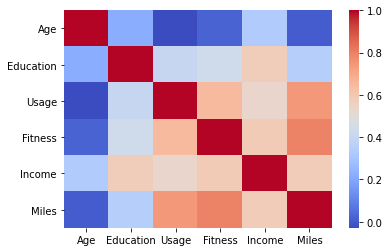

In [24]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

### Insights:
This heat map visually represents the correlations between various attributes.
- Particularly notable is the strong correlation observed among **Usage, Fitness, and Miles**.

In [25]:
def income_grp(x):
    if x<=60000:
        return 'Low'
    elif x>=90000:
        return 'High'
    else:
        return 'Mid'

In [26]:
df['Income_group']=df['Income'].apply(income_grp)

## Income Group Bufiguration:

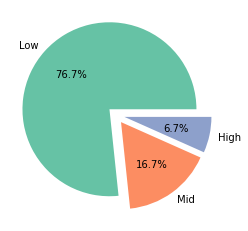

In [34]:
plt.pie(df.Income_group.value_counts(), explode=(.10,.10,.10), labels=df.Income_group.value_counts().index,autopct='%1.1f%%', colors=sns.color_palette('Set2')
)
plt.show()


### By creating the groups of diffrent income found the following: 

#### Insights:
- Income Distribution Analysis:
  - The majority of the audience falls within the income range of 50k to 60k, comprising 76.7% of the total.
  - Approximately 16.7% of the audience falls within the second income bracket.
  - A smaller portion, accounting for 6.7% of the audience, reports an income above 90k.

In [28]:
def Age_grp(x):
    if x<=30:
        return 'below 30'
    elif x>=40:
        return 'In 30s '
    else:
        return '40 Plus'

## Age Group Bufiguration:

In [29]:
df['Age_group']=df['Age'].apply(Age_grp)

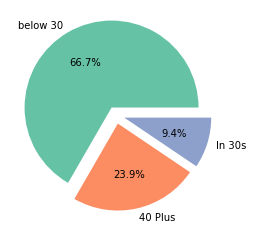

In [33]:
plt.pie(df.Age_group.value_counts(), explode=(.10,.10,.10), labels=df.Age_group.value_counts().index,autopct='%1.1f%%', colors=sns.color_palette('Set2')
)
plt.show()


### By creating the groups of diffrent Ages found the following: 

#### Insights:
- Age Distribution Analysis:
  - The majority of the audience falls under 30 comprising 66.7% of the total.
  - Approximately 23.9.7% of the audience falls within the second age bracket i.e. 30s
  - A smaller portion, accounting for 9.4% of the audience, reports an income above 40.

In [31]:
pd.crosstab(index=df['Product'], columns=df['Age_group'], margins=True)

Age_group,40 Plus,In 30s,below 30,All
Product,,,,
KP281,18,7,55,80
KP481,20,5,35,60
KP781,5,5,30,40
All,43,17,120,180


## Multivariate Analysis

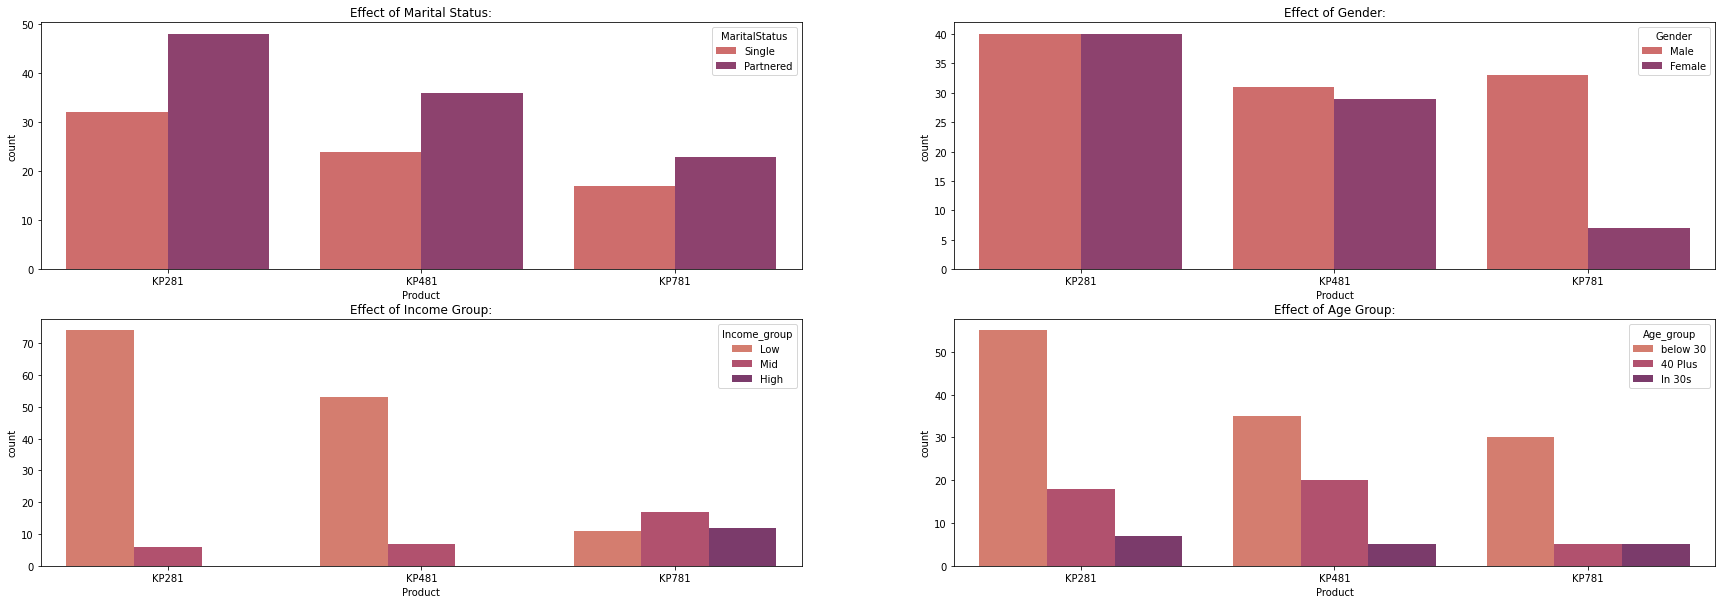

In [32]:
plt.figure(figsize=(30,10))

plt.subplot(2,2,1)
sns.countplot(data=df, x='Product', hue='MaritalStatus', palette=("flare"))
plt.title('Effect of Marital Status:')

plt.subplot(2,2,2)
sns.countplot(data=df, x='Product', hue='Gender', palette=("flare"))
plt.title('Effect of Gender:')

plt.subplot(2,2,3)
sns.countplot(data=df, x='Product', hue='Income_group', palette=("flare"))
plt.title('Effect of Income Group:')

plt.subplot(2,2,4)
sns.countplot(data=df, x='Product', hue='Age_group', palette=("flare"))
plt.title('Effect of Age Group:')


plt.show()

### Insights:
The above graphical analysis shows following reults:
- **Effect of Marital Status**:
    - **Single Individuals**: Prefer **Product KP/21**.
    - **Partnered Individuals**: Favor **Product KP/61**.
    - **Married Individuals**: Show a strong preference for **Product KP/81**.
- **Effect of Gender**:
    - **Both Males and Females**: Exhibit a higher preference for **Product KP/61**.
    - **Males**: Also show interest in **Product KP/21** (though less than females).
    - **Product KP/81** is the least preferred by both genders.
- **Effect of Income Group**:
    - **Low-Income Group**: Significantly prefers **Product KP/21**.
    - **Mid-Income Group**: Shows a balanced preference for all three products.
    - **High-Income Group**: Overwhelmingly prefers **Product KP/81**.
- **Effect by Age Group**:
    - **Below 30**: Strongly prefer **Product KP/21**.
    - **In 30s**: Show a balanced preference for all three products.
    - **Above 40s**: Significantly prefer **Product KP/81**.


## Recommedations:
- Income analysis reveals a strong preference for KP781 among high-income groups, while KP281 is favored by low-income groups, so it could be changed by thinking of prices and segments.
- Age distribution indicates a strong preference for KP281 among younger individuals, while KP781 is preferred by older age groups, so by marketing the premium product in the younger groups may help in sales of KP781.
- Both genders exhibit higher purchase probabilities for KP281, followed by KP481 and KP781.
- Partnered individuals show a consistent preference for KP481, while singles favor KP281 and married individuals strongly prefer KP781.
- Fitness ratings vary across products, with KP281 purchasers reporting higher fitness levels on average compared to KP481 and KP781 consumers. This could imply that KP281 attracts a more health-conscious consumer segment.
